<a href="https://colab.research.google.com/github/ihasdapie/YOLOv3_Adventures/blob/master/Selective_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yolo Object Tracking & Classification
Brian Chen | 2020

In [ ]:
# Selective Search RPN
import sys
import cv2
import os

In [ ]:
# params
cv2.setUseOptimized(True)
cv2.setNumThreads(4)


In [ ]:
!mkdir images
!wget https://images.unsplash.com/photo-1565381227705-87bf6245f853?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1000&q=80
!wget https://www.dw.com/image/47113704_303.jpg


mkdir: cannot create directory ‘images’: File exists
--2020-08-03 06:41:14--  https://images.unsplash.com/photo-1565381227705-87bf6245f853?ixlib=rb-1.2.1
Resolving images.unsplash.com (images.unsplash.com)... 151.101.78.208, 2a04:4e42:12::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.78.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11288032 (11M) [image/jpeg]
Saving to: ‘photo-1565381227705-87bf6245f853?ixlib=rb-1.2.1’

photo-1565381227705 100%[===================>]  10.76M  20.1MB/s    in 0.5s    

2020-08-03 06:41:15 (20.1 MB/s) - ‘photo-1565381227705-87bf6245f853?ixlib=rb-1.2.1’ saved [11288032/11288032]

--2020-08-03 06:41:16--  https://www.dw.com/image/47113704_303.jpg
Resolving www.dw.com (www.dw.com)... 2.22.3.84, 2a02:26f0:e200:2ae::2d63, 2a02:26f0:e200:284::2d63
Connecting to www.dw.com (www.dw.com)|2.22.3.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67111 (66K) [image/jpeg]
Saving to: ‘47113

In [ ]:
def selectiveSearch(img, img_height, mode):
    # 'f' for fast, 'q' for quality
    # create selective search object
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    # set image
    ss.setBaseImage(img)

    if mode == 'f':
        ss.switchToSelectiveSearchFast()
    elif mode == 'q':
        ss.switchToSelectiveSearchQuality()
    else:
        print('specify mode')
    
    # run selective search
    r_props = ss.process()
    print("Num: Region Proposals: ", len(r_props))
    return r_props

In [ ]:
from google.colab.patches import cv2_imshow
def drawRect(img, r_props, num_show, increment):
    for i, rect in enumerate(r_props):
        imOut = img.copy()
        if (i<num_show):
            x,y,w,h=rect
            cv2.rectangle(imOut, (x, y), (x+w, y+h), (0,255,0), 1, cv2.LINE_AA)
        cv2_imshow(imOut)

In [ ]:
def driver(img_dir, img_height, mode, num_show, increment):
    PATHS = [BASE_DIR+x for x in os.listdir(BASE_DIR)][:-1]
    for img_path in PATHS:
        img = cv2.imread(img_path)
        newWidth = int(img.shape[1]*img_height/img.shape[0])
        img = cv2.resize(img, (img_height, newWidth))
        r_props = selectiveSearch(img, img_height, mode)
        drawRect(img, r_props, num_show, increment)
    return 

In [ ]:
img_height=200
BASE_DIR = '/content/images/'

Num: Region Proposals:  4245


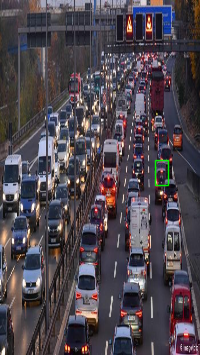

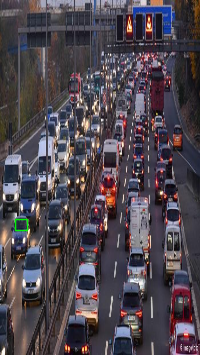

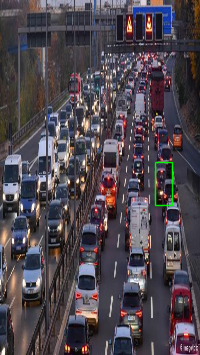

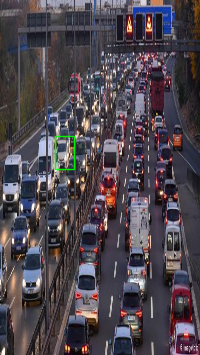

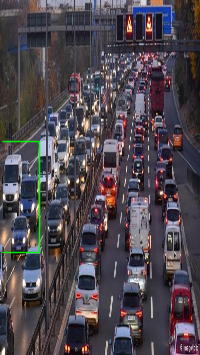

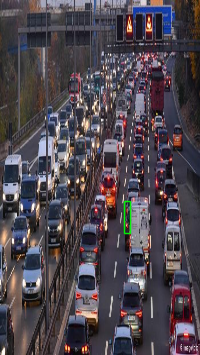

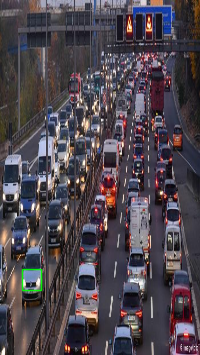

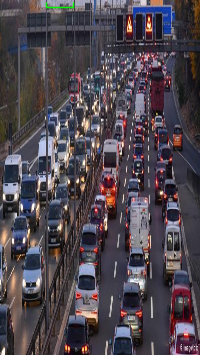

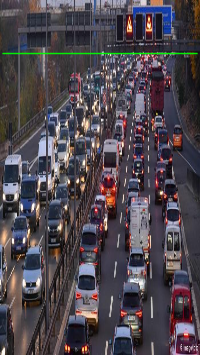

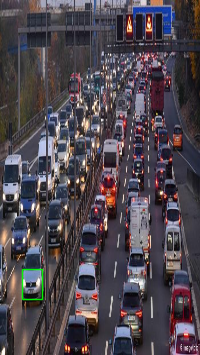

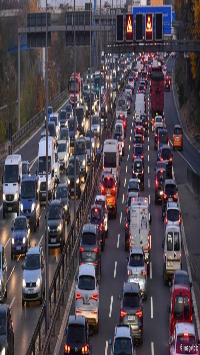

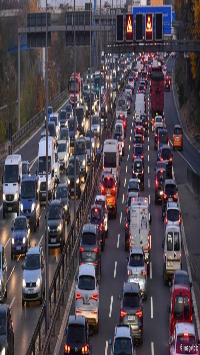

In [ ]:
driver(BASE_DIR, img_height, 'q', 10, 50)